# [Python Reference Link](http://www.data8.org/sp20/python-reference.html)
*Run the cell below so that we can set our modules up*

In [2]:
import numpy as np
from datascience import *
import math as m

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

In [3]:
iris =  Table.read_table("IRIS.csv")

# Classification - Examination through ScatterPlots

In [21]:
iris.show()

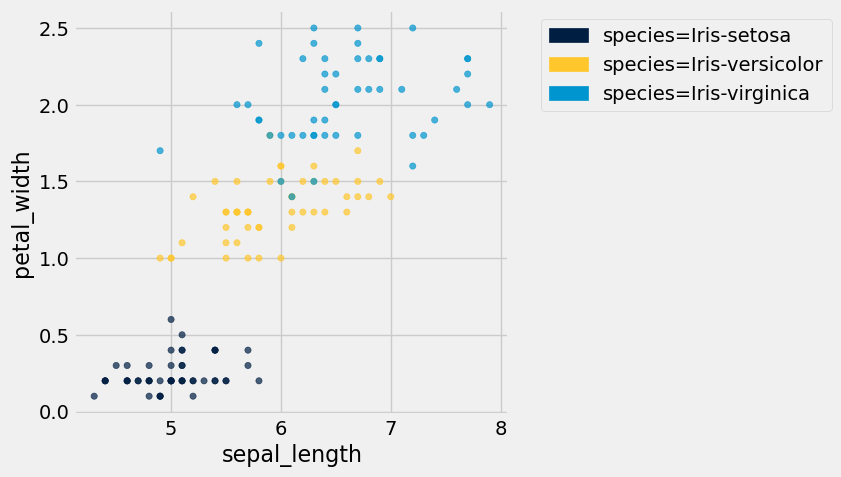

In [5]:
#let's pick two of the column labels above and observe the scatter plot. 
# Note that each of the three species will be a different color on the plot to help us differentiate 
# the iris flower species

iris.scatter( 'sepal_length', 'petal_width', group = 'species')

# Identifying key variables for classification

[{'sepal_length', 'sepal_width'}, {'sepal_length', 'petal_length'}, {'sepal_length', 'petal_width'}, {'petal_length', 'sepal_width'}, {'sepal_width', 'petal_width'}, {'petal_length', 'petal_width'}]


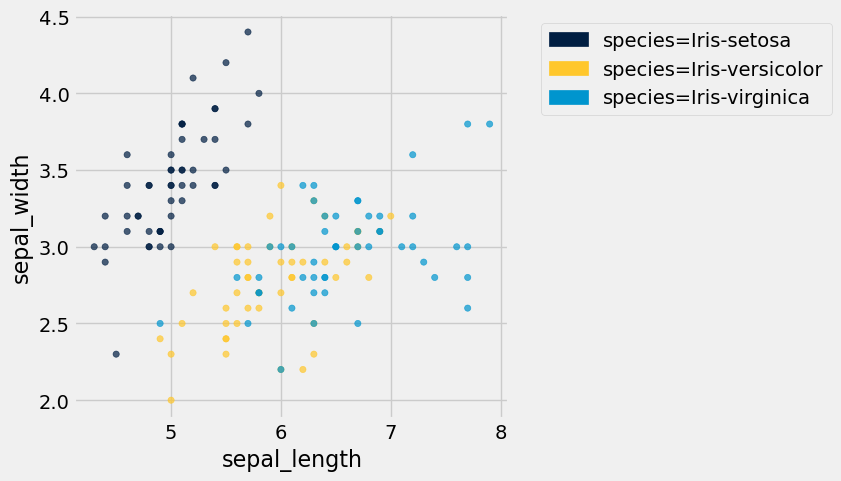

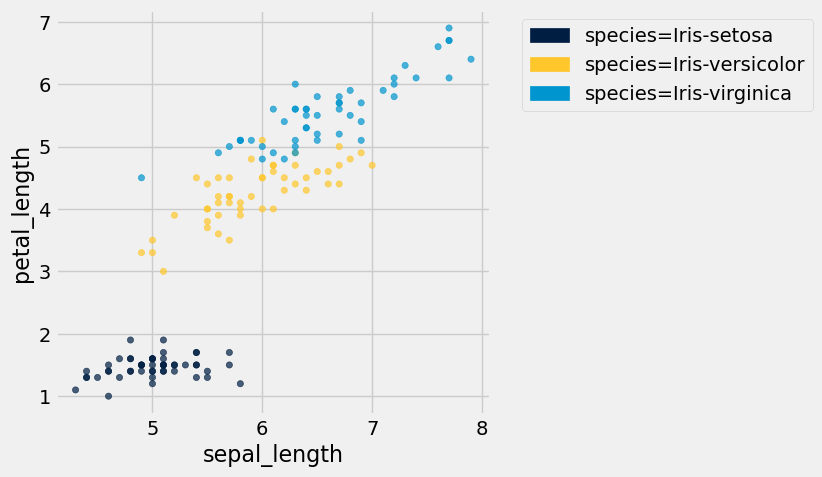

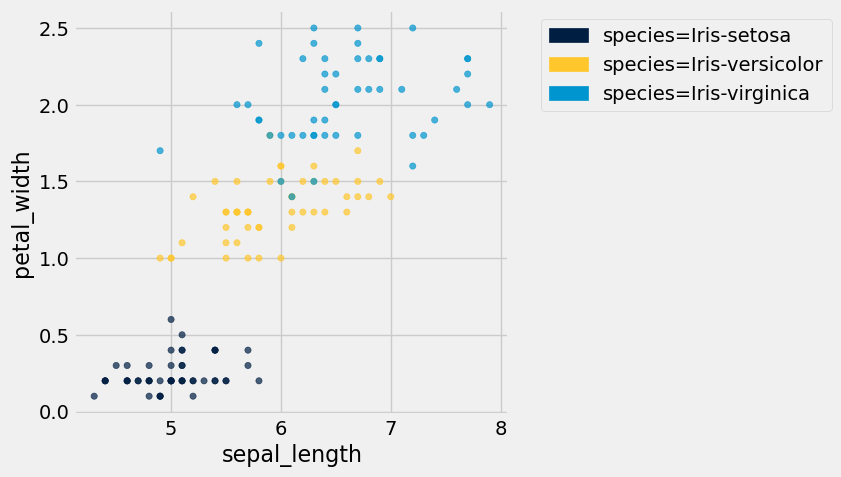

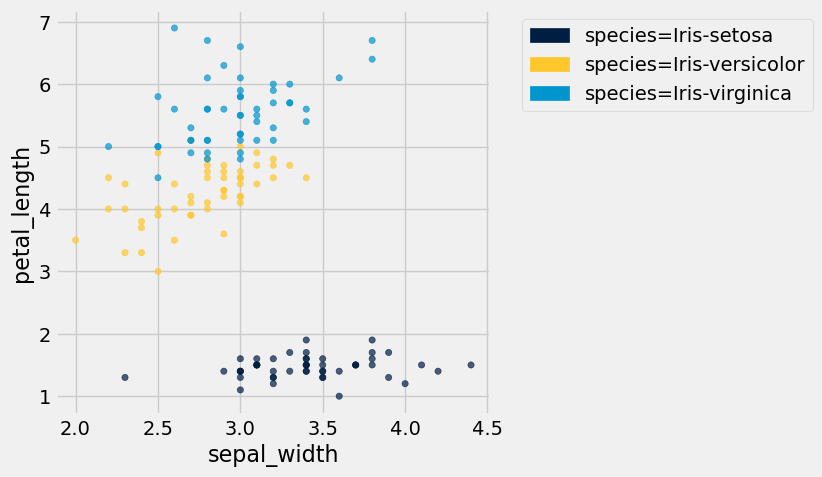

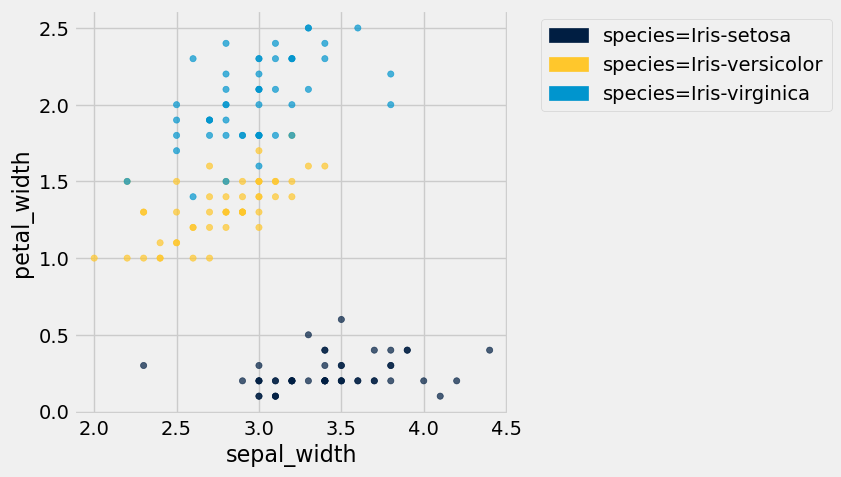

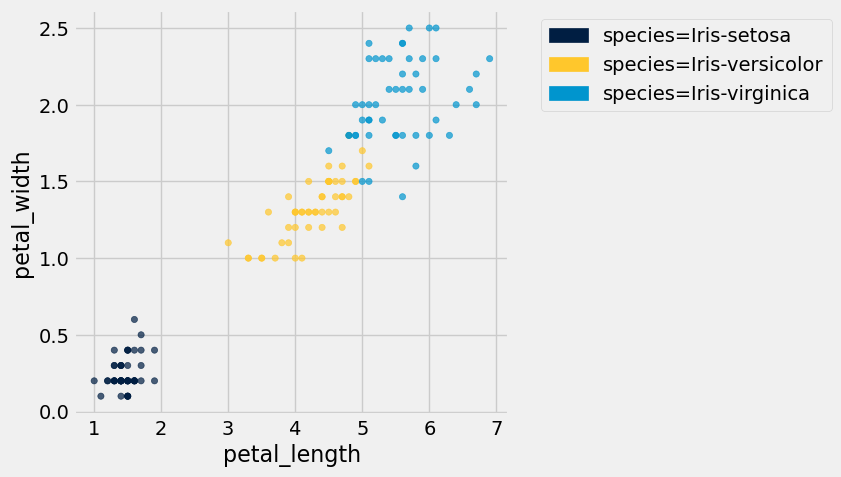

In [6]:
#Now let's look at comparing ALL of the labels to each other in pairwise comparisons
#run the code below 

labels_without_species = list(iris.labels)[:-1]
plotted_pairs = []

for x in labels_without_species:
    for y in labels_without_species:
        
        ordered_pair =  {x,y}
        
        if (x != y) and (ordered_pair not in plotted_pairs):
            iris.scatter(x,y,group='species')
            plotted_pairs.append(ordered_pair)
            
print(plotted_pairs)    

# Creating Training and Testing Data Sets

In [7]:
print('The iris data set has',iris.num_rows,'flowers represented in the sameple')

The iris data set has 150 flowers represented in the sameple


In [10]:
iris.sample(with_replacement = False)

sepal_length | sepal_width | petal_length | petal_width | species
4.9          | 2.5         | 4.5          | 1.7         | Iris-virginica
4.4          | 2.9         | 1.4          | 0.2         | Iris-setosa
5.9          | 3           | 5.1          | 1.8         | Iris-virginica
6.3          | 2.7         | 4.9          | 1.8         | Iris-virginica
7.7          | 3           | 6.1          | 2.3         | Iris-virginica
5            | 3.4         | 1.6          | 0.4         | Iris-setosa
6.3          | 3.4         | 5.6          | 2.4         | Iris-virginica
5.7          | 2.5         | 5            | 2           | Iris-virginica
5.7          | 3.8         | 1.7          | 0.3         | Iris-setosa
4.4          | 3           | 1.3          | 0.2         | Iris-setosa
... (140 rows omitted)

Let's separate 100 rows of data and use it for the training set, and then use the remaining 50 rows of data for the test set. Since the table is organized nicely by species (which is what we are classifying) we want to mix these rows up. We can do this using the `sample` method to shuffle, and then `take` the first 100 rows for training, and the last 50 rows for testing

In [13]:
shuffled_iris = iris.sample(with_replacement = False)

train_iris = shuffled_iris.take(np.arange(100))
test_iris = shuffled_iris.take(np.arange(100,iris.num_rows))

print("Training set:\t",   train_iris.num_rows, "examples")
print("Test set:\t",       test_iris.num_rows, "examples")
train_iris.show(5), test_iris.show(5);

Training set:	 100 examples
Test set:	 50 examples


# The Distance Formula

In [18]:
((3 - 0)**2 + (4 - 0)**2 + (5-0)**2)**(0.5)

7.0710678118654755

In [17]:
first = make_array(0,0,0)
second = make_array(3,4,5)

(sum((first - second)**2))**(0.5)

7.0710678118654755

In [19]:
first_iris = iris.column('petal_length')
second_iris = iris.column('petal_width')

(sum((first_iris - second_iris)**2))**(0.5)

33.872702874143364

In [29]:
first_setosa = np.array(iris.drop('species').row(0)) #store all the attributes of the first setosa iris
second_setosa = np.array(iris.drop('species').row(1)) #store all the attributes of the second setosa iris
first_virginica = np.array(iris.drop('species').row(-1)) #store all the attributes of the last virginica iris

In [30]:
(sum((first_setosa - second_setosa)**2))**(1/2)

0.53851648071345015

In [31]:
(sum((first_setosa - first_virginica)**2))**(1/2)

4.1400483088968905